In [2]:
# =============================================
# 1. Importar las librerías necesarias
# =============================================


from pathlib import Path
import uproot
import pandas as pd
import numpy as np

In [19]:
# =============================================
# 3. Definir la ruta del archivo ROOT y el nombre del árbol
# =============================================

# Ruta al archivo ROOT 
#DTDPGNtuple_12_4_2_Phase2Concentrator_Simulation_89
ruta_archivo_root = '../dtTuples/DTDPGNtuple_12_4_2_Phase2Concentrator_Simulation_89.root'

#Fijate que pongo ../* para que busque en el directorio anterior, ya que los datos están en el directorio dtTuples, el cual esta un nivel por encima de este script

# Nombre del árbol dentro del archivo ROOT 
nombre_arbol = 'dtNtupleProducer/DTTREE;1'

In [20]:
# =============================================
# 4. Definir las ramas a extraer
# =============================================

# Lista de ramas numéricas relacionadas con 'seg'
ramas_seg_numericas = [
    "seg_nSegments",
    "seg_wheel",
    "seg_sector",
    "seg_station",
    "seg_hasPhi",
    "seg_hasZed",
    "seg_posLoc_x",
    "seg_posLoc_y",
    "seg_posLoc_z",
    "seg_dirLoc_x",
    "seg_dirLoc_y",
    "seg_dirLoc_z",
    "seg_posLoc_x_SL1",
    "seg_posLoc_x_SL3",
    "seg_posLoc_x_midPlane",
    "seg_posGlb_phi",
    "seg_posGlb_eta",
    "seg_dirGlb_phi",
    "seg_dirGlb_eta",
    "seg_phi_t0",
    "seg_phi_vDrift",
    "seg_phi_normChi2",
    "seg_phi_nHits",
    "seg_z_normChi2",
    "seg_z_nHits"
]

# Lista completa de ramas a extraer
ramas_a_extraer = [
    "event_eventNumber",  
    "digi_nDigis", "digi_wheel", "digi_sector", "digi_station", 
    "digi_superLayer", "digi_layer", "digi_wire", "digi_time",
    *ramas_seg_numericas  # Desempaqueta las ramas de 'seg'
]

In [21]:
# =============================================
# 6. Función para cargar el archivo ROOT y obtener el árbol
# =============================================

def cargar_archivo_root(ruta, arbol):
    """
    Abre un archivo ROOT y obtiene el árbol especificado.
    
    Parámetros:
        ruta (str o Path): Ruta al archivo ROOT.
        arbol (str): Nombre del árbol dentro del archivo ROOT.
        
    Retorna:
        uproot.reading.ReadOnlyTree: El árbol ROOT si se encuentra, de lo contrario None.
    """
    try:
        archivo = uproot.open(ruta)
        arbol_root = archivo[arbol]
        print(f"Árbol '{arbol}' cargado exitosamente.")
        return arbol_root
    except Exception as e:
        print(f"Error al abrir el archivo ROOT o al acceder al árbol: {e}")
        return None

![](imgs/2024-11-15-12-53-31.png)

COn la extension Root_file_viewer se puede ver el contenido de los archivos .root

Así pòdemos ver el nombre del arbol y de las variables que contiene

![](imgs/2024-11-15-12-54-57.png)

In [22]:
# =============================================
# 7. Cargar el árbol ROOT
# =============================================

# Cargar el árbol ROOT
arbol_root = cargar_archivo_root(ruta_archivo_root, nombre_arbol)

# Verificar si el árbol se cargó correctamente
if arbol_root is None:
    raise SystemExit("No se pudo cargar el árbol ROOT. Deteniendo la ejecución.")

Árbol 'dtNtupleProducer/DTTREE;1' cargado exitosamente.


In [24]:
# =============================================
# 8. Verificar las ramas disponibles en el árbol
# =============================================

# Obtener todas las ramas disponibles en el árbol
ramas_disponibles = arbol_root.keys()
print(f"Ramas disponibles en el árbol: {ramas_disponibles}")

# Identificar las ramas faltantes
ramas_faltantes = [rama for rama in ramas_a_extraer if rama not in ramas_disponibles]
if ramas_faltantes:
    print(f"Advertencia: Las siguientes ramas no se encontraron y serán omitidas: {ramas_faltantes}")
else:
    print("Todas las ramas especificadas están disponibles en el árbol.")

# Filtrar solo las ramas que existen
ramas_existentes = [rama for rama in ramas_a_extraer if rama in ramas_disponibles]
print(f"Ramas que se extraerán: {ramas_existentes}")

Ramas disponibles en el árbol: ['gen_nGenParts', 'gen_pdgId', 'gen_pt', 'gen_phi', 'gen_eta', 'gen_charge', 'event_runNumber', 'event_lumiBlock', 'event_eventNumber', 'event_timeStamp', 'event_bunchCrossing', 'event_orbitNumber', 'environment_truePileUp', 'environment_actualPileUp', 'environment_instLumi', 'environment_nPV', 'environment_pv_x', 'environment_pv_y', 'environment_pv_z', 'environment_pv_xxErr', 'environment_pv_yyErr', 'environment_pv_zzErr', 'environment_pv_xyErr', 'environment_pv_xzErr', 'environment_pv_yzErr', 'digi_nDigis', 'digi_wheel', 'digi_sector', 'digi_station', 'digi_superLayer', 'digi_layer', 'digi_wire', 'digi_time', 'ph2Digi_nDigis', 'ph2Digi_wheel', 'ph2Digi_sector', 'ph2Digi_station', 'ph2Digi_superLayer', 'ph2Digi_layer', 'ph2Digi_wire', 'ph2Digi_time', 'seg_nSegments', 'seg_wheel', 'seg_sector', 'seg_station', 'seg_hasPhi', 'seg_hasZed', 'seg_posLoc_x', 'seg_posLoc_y', 'seg_posLoc_z', 'seg_dirLoc_x', 'seg_dirLoc_y', 'seg_dirLoc_z', 'seg_posLoc_x_SL1', 'seg

In [25]:
# =============================================
# 9. Extraer las ramas y convertir a DataFrame
# =============================================

try:
    # Extraer las ramas en un DataFrame de pandas
    df = arbol_root.arrays(ramas_existentes, library="pd")
    print("Datos extraídos exitosamente en un DataFrame de pandas.")
except Exception as e:
    print(f"Error al extraer las ramas: {e}")
    raise SystemExit("No se pudo extraer los datos. Deteniendo la ejecución.")

# Mostrar las primeras filas del DataFrame
print("Vista previa del DataFrame:")
display(df.head())

# Debido al tamaño, vamos a coger solo la mitad de las filas
df = df.sample(frac=0.5)


Datos extraídos exitosamente en un DataFrame de pandas.
Vista previa del DataFrame:


,event_eventNumber,digi_nDigis,digi_wheel,digi_sector,digi_station,digi_superLayer,digi_layer,digi_wire,digi_time,seg_nSegments,...,seg_posGlb_phi,seg_posGlb_eta,seg_dirGlb_phi,seg_dirGlb_eta,seg_phi_t0,seg_phi_vDrift,seg_phi_normChi2,seg_phi_nHits,seg_z_normChi2,seg_z_nHits
0,52244,120,"[-1, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, ...","[1, 2, 3, 1, 1, 1, 2, 2, 3, 3, 4, 4, 1, 1, 2, ...","[12, 13, 12, 33, 33, 34, 34, 35, 33, 34, 34, 3...","[722.65625, 835.9375, 665.625, 710.15625, 864....",17,...,"[0.09168455004692078, 2.2656004428863525, 2.28...","[-0.710488498210907, 0.13620427250862122, 0.13...","[0.0009383984142914414, 2.262542247772217, 2.7...","[-0.7587687373161316, 0.8452392816543579, 0.70...","[-999.0, -4.070964336395264, -145.093307495117...","[-999.0, -0.06901435554027557, 0.0, 0.0, 0.0, ...","[-1.0, 3.083855390548706, -0.5, 30.16861534118...","[0, 7, 4, 4, 4, 5, 0, 3, 3, 4, 4, 5, 4, 6, 4, ...","[4.910408973693848, 0.06704063713550568, 0.011...","[3, 3, 3, 3, 3, 3, 4, 4, 3, 4, 3, 3, 3, 3, 3, ..."
1,52251,92,"[2, 2, 2, 2, 2, 2, 2, -2, -2, -2, -2, -2, -2, ...","[1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2, 2, 2, 2, 2, 2, 3, 1, 1, 1, 1, 2, 2, 2, 2, ...","[1, 1, 2, 2, 3, 4, 1, 1, 2, 3, 4, 1, 2, 3, 4, ...","[49, 50, 48, 50, 46, 46, 36, 18, 19, 18, 19, 3...","[715.625, 771.09375, 892.96875, 594.53125, 878...",7,...,"[0.5467966794967651, 2.739610195159912, 0.5468...","[-1.000199794769287, 0.1904498189687729, -1.00...","[0.5489578247070312, 2.324812412261963, 0.5478...","[-1.141993522644043, 0.4516723155975342, -1.05...","[2.10858154296875, 69.48719024658203, 1.868632...","[0.095939502120018, -0.07863318175077438, 0.0,...","[1.475873589515686, -0.20000000298023224, 1.09...","[7, 7, 7, 7, 4, 7, 8]","[15.315128326416016, 0.996015191078186, 4.1042...","[4, 3, 4, 4, 3, 3, 3]"
2,52242,123,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -2, -2...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 1, 1, ...","[1, 2, 3, 4, 1, 2, 3, 4, 4, 1, 2, 3, 4, 1, 2, ...","[16, 17, 17, 17, 20, 21, 20, 20, 21, 20, 20, 2...","[828.125, 553.90625, 662.5, 770.3125, 844.5312...",11,...,"[0.6781520247459412, 1.7767831087112427, -2.72...","[0.6432187557220459, -1.0228902101516724, 0.41...","[0.0984124019742012, 1.2387571334838867, -2.73...","[0.5842284560203552, -0.00031552070868201554, ...","[-30.261667251586914, 7.133979797363281, -0.92...","[-0.008547604084014893, 0.0, -0.16149273514747...","[0.41559532284736633, 1.2939088344573975, 0.87...","[8, 4, 8, 8, 8, 8, 8, 6, 8, 8, 4]","[0.03944810852408409, -1.0, 0.3956128358840942...","[4, 0, 4, 4, 4, 4, 4, 4, 4, 0, 0]"
3,52254,117,"[-1, -1, -1, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, ...","[3, 3, 3, 4, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, ...","[42, 43, 43, 43, 43, 40, 41, 41, 41, 12, 13, 1...","[994.53125, 655.46875, 946.09375, 660.9375, 84...",10,...,"[0.2397647351026535, 2.3133928775787354, -2.89...","[-0.15505385398864746, -1.0206985473632812, 0....","[0.23677466809749603, 2.950246572494507, -2.78...","[-0.1499621868133545, 0.0001995824568439275, 0...","[-2.4554452896118164, 36.44190979003906, 29.25...","[-0.012762983329594135, 0.015863822773098946, ...","[0.7264447808265686, 0.28025326132774353, 0.90...","[6, 5, 5, 3, 3, 8, 4, 4, 7, 3]","[0.38897570967674255, -1.0, 0.2077392786741256...","[4, 0, 4, 4, 0, 4, 0, 3, 4, 0]"
4,52248,43,"[2, 2, 2, 2, -1, -1, -1, -1, -1, -1, -1, -1, -...","[3, 5, 7, 7, 12, 12, 12, 12, 12, 12, 4, 4, 4, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, ...","[3, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 4, 1, 2, 1, 1, 2

![](imgs/2024-11-15-12-44-54.png)

*Podemos descargarnos una extension de vscode que permita ver los dataframes con mayor claridad, para asi poder entender mejor los datos con los que estamos trabajando*
- **Microsoft data wrangler**

Para usarlo simplemente clicamos en el archivo que queremos ver y le damos a la opcion de "Open in data wrangler"

![](imgs/2024-11-15-12-56-36.png)

In [26]:
df.head()

,event_eventNumber,digi_nDigis,digi_wheel,digi_sector,digi_station,digi_superLayer,digi_layer,digi_wire,digi_time,seg_nSegments,...,seg_posGlb_phi,seg_posGlb_eta,seg_dirGlb_phi,seg_dirGlb_eta,seg_phi_t0,seg_phi_vDrift,seg_phi_normChi2,seg_phi_nHits,seg_z_normChi2,seg_z_nHits
140,52380,97,"[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 1, 2, 2, ...","[4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 4, 6, 6, 6, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 3, 1, 1, 1, ...","[1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 1, 2, ...","[12, 13, 12, 12, 3, 4, 3, 3, 10, 10, 9, 10, 20...","[741.40625, 775.0, 525.0, 759.375, 737.5, 885....",8,...,"[1.794924259185791, 2.815218925476074, -2.4777...","[1.161958932876587, 1.0242053270339966, 1.1416...","[2.0699703693389893, 2.614739179611206, -1.920...","[0.6794846057891846, -0.00011853751493617892, ...","[-2.8502955436706543, 55.7614631652832, 19.718...","[-0.037432365119457245, 0.0, -0.00358789530582...","[5.857372283935547, 0.8900167942047119, 0.0711...","[7, 4, 5, 3, 7, 5, 8, 7]","[4.516211032867432, -1.0, 0.001641817972995340...","[4, 0, 4, 3, 4, 0, 4, 0]"
20,52257,103,"[0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 2, 2, 2, -2,...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 3, 4, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 2, 2, 2, 2, 3, 3, 3, 1, 1, 3, 1, ...","[1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 4, 3, 4, 2, 1, ...","[26, 27, 26, 27, 16, 17, 16, 17, 27, 27, 27, 3...","[696.875, 686.71875, 696.875, 682.03125, 746.0...",10,...,"[0.598264217376709, 2.709561347961426, -2.7208...","[0.11953118443489075, 1.0170278549194336, -1.0...","[0.5232354998588562, 2.618035078048706, 2.8271...","[0.1333000361919403, 0.6291869282722473, -5.62...","[-0.08983888477087021, -999.0, 21.292703628540...","[0.0, -999.0, 0.0, 0.0, -999.0, 0.0, 0.0, 0.0,...","[0.4787728786468506, -1.0, 11.439302444458008,...","[7, 0, 3, 3, 0, 8, 4, 3, 8, 8]","[0.08735495060682297, 0.043288446962833405, -1...","[4, 4, 0, 3, 4, 4, 0, 4, 4, 0]"
221,52465,27,"[-2, -2, -2, -2, -2, 1, 1, 1, 1, 1, 1, 1, 1, 1...","[1, 1, 1, 1, 1, 6, 6, 6, 6, 6, 6, 6, 6, 6, 6, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[3, 3, 3, 3, 3, 1, 1, 1, 1, 2, 2, 2, 3, 3, 3, ...","[2, 3, 4, 4, 4, 1, 2, 3, 4, 1, 3, 4, 1, 2, 3, ...","[44, 44, 44, 45, 46, 45, 45, 44, 45, 48, 47, 4...","[816.40625, 510.9375, 729.6875, 857.8125, 844....",3,...,"[0.18891999125480652, 2.5497653484344482, -1.6...","[-1.0254262685775757, 0.5855147242546082, -0.5...","[1.2475515604019165, -2.7246432304382324, -2.3...","[-0.00013215203944128007, 0.000811401638202369...","[-11.440707206726074, 31.761240005493164, -14....","[0.0, 0.0, 0.0]","[3.3042173385620117, 0.01132548414170742, 4.37...","[3, 4, 3]","[-1.0, -1.0, -1.0]","[0, 0, 0]"
25,52267,159,"[2, 2, 2, 2, 2, 2, 2, 2, 2, -1, -1, -1, -1, -1...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2, 2, 2, 2, 3, 3, 3, 3, 3, 1, 1, 1, 1, 1, 2, ...","[1, 2, 3, 4, 1, 2, 2, 3, 4, 1, 1, 2, 3, 4, 1, ...","[45, 46, 45, 45, 4, 4, 42, 4, 5, 30, 34, 30, 2...","[713.28125, 881.25, 607.03125, 714.0625, 786.7...",18,...,"[0.3073573112487793, 0.6125348806381226, 0.581...","[0.8975927829742432, -0.5846534371376038, -0.0...","[-0.6703454256057739, -0.4146980047225952, -0....","[0.4009779989719391, -0.00026170670753344893, ...","[50.64250564575195, -999.0, -1.848902106285095...","[0.0, 0.0, 0.0, -0.019177095964550972, 0.0, 0....","[1.840907335281372, 14.204903602600098, 0.0636...","[4, 7, 3, 6, 4, 4, 5, 5, 4, 6, 4, 4, 3, 4, 7, ...","[-0.5, -1.0, -1.0, 2.6875641345977783, 0.0, 0....","[4, 0, 0, 3, 4, 4, 4, 4, 0, 0, 0, 4, 0, 0, 0, ..."
430,52667,136,"[-2, -2, -2, -2, -2, -2, -2, -2, 1, 1, 1, 1, 1...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2, 2, 2, 2, 3, 3, 3, 3, 1, 1, 1, 1, 2, 2, 2, ...","[1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, 3, ...","[11, 11, 11, 11, 3, 3, 2, 3, 34, 35, 34, 35, 4...","[638.28125, 772.

![](imgs/2024-11-15-12-57-49.png)

Aquí podemos ver como para cada evento, tenemos un numero determinado de digis y de los segmentos que producen, que vienen ordenados por wheel, sector, station. Dentro de listas.

138	52387	21	[2, 1, 1, 2, 2, 2, 2, -2, -1, -1, -1, 2, 2, 1, 1, 1, 1, 1, 1, -2, -2]	[3, 4, 4, 6, 8, 8, 8, 9, 3, 3, 3, 8, 8, 5, 5, 5, 5, 5, 5, 13, 13]	[1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4]	[1, 2, 2, 1, 2, 2, 2, 3, 1, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3, 3]	[3, 1, 2, 2, 1, 2, 3, 3, 4, 2, 3, 1, 1, 1, 1, 2, 3, 4, 4, 3, 4]	[45, 9, 10, 11, 17, 17, 16, 26, 29, 23, ..., 43, 53, 71, 71, 70, 60, 61, 10, 11]	[905, 640, 549, 604, 623, 585, 605, 708, ..., 700, 714, 740, 852, 883, 663, 852]	2	[2, 1]	[8, 5]	[1, 3]	[0, 1]	[1, 0]	[-0.5, 166]	[44.3, 0]	[0, 0]	[-1.68e-08, -0.86]	[0.837, 0]	[-0.547, -0.51]	[-999, 183]	[-999, 143]	[-999, 163]	[-2.53, 1.87]	[1.1, 0.411]	[-2.62, 3.13]	[1.21, -0.000316]	[-999, -999]	[-999, 0]	[-1, 1.43]	[0, 3]	[2.6, -1]	[3, 0]

Este es un ejemplo de una fila del df.

- 138 es el numero de fila dentro del df
- 52387 es el numero de evento
- 21 es el numero de digis que tiene el evento
- [2, 1, 1, 2, 2, 2, 2, -2, -1, -1, -1, 2, 2, 1, 1, 1, 1, 1, 1, -2, -2] es la wheel a la que pertenece cada digi
- [3, 4, 4, 6, 8, 8, 8, 9, 3, 3, 3, 8, 8, 5, 5, 5, 5, 5, 5, 13, 13] es el sector al que pertenece cada digi
- [1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 3, 3, 4, 4] es la estacion a la que pertenece cada digi
etc.

esto nos da la idea de como estan estructurados los datos y como podemos acceder a ellos

In [27]:
# Ramas relacionadas con 'digis'
ramas_digis = [
    "event_eventNumber",
    "digi_nDigis", "digi_wheel", "digi_sector", "digi_station", 
    "digi_superLayer", "digi_layer", "digi_wire", "digi_time"
]

# Ramas relacionadas con 'segments' (seg)
ramas_segments = [
    "event_eventNumber",
    "seg_nSegments",
    "seg_wheel",
    "seg_sector",
    "seg_station",
    "seg_hasPhi",
    "seg_hasZed",
    "seg_posLoc_x",
    "seg_posLoc_y",
    "seg_posLoc_z",
    "seg_dirLoc_x",
    "seg_dirLoc_y",
    "seg_dirLoc_z",
    "seg_posLoc_x_SL1",
    "seg_posLoc_x_SL3",
    "seg_posLoc_x_midPlane",
    "seg_posGlb_phi",
    "seg_posGlb_eta",
    "seg_dirGlb_phi",
    "seg_dirGlb_eta",
    "seg_phi_t0",
    "seg_phi_vDrift",
    "seg_phi_normChi2",
    "seg_phi_nHits",
    "seg_z_normChi2",
    "seg_z_nHits"
]

# Combinar todas las ramas a extraer
ramas_a_extraer = ramas_digis + ramas_segments


In [28]:

# Extraer las ramas relacionadas con 'digis' en un DataFrame de pandas
df_digis = arbol_root.arrays(ramas_digis, library="pd")

# Extraer las ramas relacionadas con 'segments' en otro DataFrame de pandas
df_segments = arbol_root.arrays(ramas_segments, library="pd")

# Mostrar una vista previa de los DataFrames
print("Vista previa del DataFrame de 'digis':")
display(df_digis.head())

print("\nVista previa del DataFrame de 'segments':")
display(df_segments.head())


Vista previa del DataFrame de 'digis':


,event_eventNumber,digi_nDigis,digi_wheel,digi_sector,digi_station,digi_superLayer,digi_layer,digi_wire,digi_time
0,52244,120,"[-1, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, ...","[1, 2, 3, 1, 1, 1, 2, 2, 3, 3, 4, 4, 1, 1, 2, ...","[12, 13, 12, 33, 33, 34, 34, 35, 33, 34, 34, 3...","[722.65625, 835.9375, 665.625, 710.15625, 864...."
1,52251,92,"[2, 2, 2, 2, 2, 2, 2, -2, -2, -2, -2, -2, -2, ...","[1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2, 2, 2, 2, 2, 2, 3, 1, 1, 1, 1, 2, 2, 2, 2, ...","[1, 1, 2, 2, 3, 4, 1, 1, 2, 3, 4, 1, 2, 3, 4, ...","[49, 50, 48, 50, 46, 46, 36, 18, 19, 18, 19, 3...","[715.625, 771.09375, 892.96875, 594.53125, 878..."
2,52242,123,"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -2, -2...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 1, 1, ...","[1, 2, 3, 4, 1, 2, 3, 4, 4, 1, 2, 3, 4, 1, 2, ...","[16, 17, 17, 17, 20, 21, 20, 20, 21, 20, 20, 2...","[828.125, 553.90625, 662.5, 770.3125, 844.5312..."
3,52254,117,"[-1, -1, -1, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, ...","[3, 3, 3, 4, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, ...","[42, 43, 43, 43, 43, 40, 41, 41, 41, 12, 13, 1...","[994.53125, 655.46875, 946.09375, 660.9375, 84..."
4,52248,43,"[2, 2, 2, 2, -1, -1, -1, -1, -1, -1, -1, -1, -...","[3, 5, 7, 7, 12, 12, 12, 12, 12, 12, 4, 4, 4, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, ...","[3, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 4, 1, 2, 1, 1, 2, 2, 3, 4, 1, 2, 3, 2, 3, ...","[4, 44, 57, 58, 39, 43, 39, 44, 38, 38, 18, 19...","[839.84375, 464.84375, 847.65625, 853.125, 631..."



Vista previa del DataFrame de 'segments':


,event_eventNumber,seg_nSegments,seg_wheel,seg_sector,seg_station,seg_hasPhi,seg_hasZed,seg_posLoc_x,seg_posLoc_y,seg_posLoc_z,...,seg_posGlb_phi,seg_posGlb_eta,seg_dirGlb_phi,seg_dirGlb_eta,seg_phi_t0,seg_phi_vDrift,seg_phi_normChi2,seg_phi_nHits,seg_z_normChi2,seg_z_nHits
0,52244,17,"[-1, 0, 0, 0, 0, 0, -2, 1, 1, 1, 1, 2, 2, 0, 0...","[1, 5, 5, 5, 5, 5, 7, 7, 7, 7, 7, 10, 10, 5, 5...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, ...","[0, 1, 1, 1, 1, 1, 0, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[0.4999981224536896, 35.421932220458984, 44.46...","[66.40859985351562, -58.95674514770508, -58.95...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, -4.768371582031...",...,"[0.09168455004692078, 2.2656004428863525, 2.28...","[-0.710488498210907, 0.13620427250862122, 0.13...","[0.0009383984142914414, 2.262542247772217, 2.7...","[-0.7587687373161316, 0.8452392816543579, 0.70...","[-999.0, -4.070964336395264, -145.093307495117...","[-999.0, -0.06901435554027557, 0.0, 0.0, 0.0, ...","[-1.0, 3.083855390548706, -0.5, 30.16861534118...","[0, 7, 4, 4, 4, 5, 0, 3, 3, 4, 4, 5, 4, 6, 4, ...","[4.910408973693848, 0.06704063713550568, 0.011...","[3, 3, 3, 3, 3, 3, 4, 4, 3, 4, 3, 3, 3, 3, 3, ..."
1,52251,7,"[-2, 0, -2, -2, -2, -2, -2]","[2, 6, 2, 2, 8, 8, 8]","[1, 1, 2, 2, 2, 2, 3]","[1, 1, 1, 1, 1, 1, 1]","[1, 1, 1, 1, 1, 1, 1]","[-29.115989685058594, -13.594767570495605, 33....","[-26.32220458984375, 84.05804443359375, 71.450...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0]",...,"[0.5467966794967651, 2.739610195159912, 0.5468...","[-1.000199794769287, 0.1904498189687729, -1.00...","[0.5489578247070312, 2.324812412261963, 0.5478...","[-1.141993522644043, 0.4516723155975342, -1.05...","[2.10858154296875, 69.48719024658203, 1.868632...","[0.095939502120018, -0.07863318175077438, 0.0,...","[1.475873589515686, -0.20000000298023224, 1.09...","[7, 7, 7, 7, 4, 7, 8]","[15.315128326416016, 0.996015191078186, 4.1042...","[4, 3, 4, 4, 3, 3, 3]"
2,52242,11,"[1, -2, 1, 1, 1, 1, -1, 1, 1, 1, 1]","[2, 4, 8, 11, 2, 8, 12, 12, 8, 8, 8]","[1, 1, 1, 1, 2, 2, 2, 2, 3, 4, 4]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 0, 1, 1, 1, 1, 1, 1, 1, 0, 0]","[-28.02860450744629, 50.99497604370117, 85.469...","[32.665016174316406, 0.0, -83.4660873413086, 1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",...,"[0.6781520247459412, 1.7767831087112427, -2.72...","[0.6432187557220459, -1.0228902101516724, 0.41...","[0.0984124019742012, 1.2387571334838867, -2.73...","[0.5842284560203552, -0.00031552070868201554, ...","[-30.261667251586914, 7.133979797363281, -0.92...","[-0.008547604084014893, 0.0, -0.16149273514747...","[0.41559532284736633, 1.2939088344573975, 0.87...","[8, 4, 8, 8, 8, 8, 8, 6, 8, 8, 4]","[0.03944810852408409, -1.0, 0.3956128358840942...","[4, 0, 4, 4, 4, 4, 4, 4, 4, 0, 0]"
3,52254,10,"[0, -2, 1, 1, 1, -1, 1, -1, 0, 2]","[1, 5, 7, 7, 8, 12, 4, 12, 1, 4]","[1, 1, 1, 1, 1, 1, 2, 2, 3, 3]","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1]","[1, 0, 1, 1, 0, 1, 0, 1, 1, 0]","[66.2711410522461, 56.85696792602539, -69.9512...","[69.94519805908203, 0.0, 11.396491050720215, 1...","[0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, 0.0, ...",...,"[0.2397647351026535, 2.3133928775787354, -2.89...","[-0.15505385398864746, -1.0206985473632812, 0....","[0.23677466809749603, 2.950246572494507, -2.78...","[-0.1499621868133545, 0.0001995824568439275, 0...","[-2.4554452896118164, 36.44190979003906, 29.25...","[-0.012762983329594135, 0.015863822773098946, ...","[0.7264447808265686, 0.28025326132774353, 0.90...","[6, 5, 5, 3, 3, 8, 4, 4, 7, 3]","[0.38897570967674255, -1.0, 0.2077392786741256...","[4, 0, 4, 4, 0, 4, 0, 3, 4, 0]"
4,52248,5,"[-1, -1, -1, -2, -2]","[12, 12, 4, 11, 11]","[1, 1, 2, 2, 3]","[1, 1, 1, 1, 1]","[0, 0, 0, 1, 1]","[30.186201095581055, 40.07540512084961, -40.63...","[0.0, 0.0, 0.0, -109.61477661132812, -23.50193...","[0.0, 0.0, 0.0, 0.0, 0.0]",...,"[-0.3641812801361084, -0.34191325306892395, 1....","[-0.580014169216156, -0.5780113935470581, -0.4...","[-1.6155983

Las columnas extraídas pueden contener Awkward Arrays, que son estructuras de datos que permiten listas de diferentes longitudes en cada fila. Para manipular estos datos con pandas de manera efectiva, es recomendable convertirlos a listas de Python estándar. 

convertir_a_lista: Verifica si el elemento es una lista, tupla o arreglo de numpy. Si lo es, lo convierte en una lista de Python. Si es un valor escalar, lo envuelve en una lista para mantener la consistencia.
Aplicación: Se aplica esta función a todas las columnas de ambos DataFrames para asegurar que todas las entradas sean listas de Python.

In [29]:
# Función para convertir Awkward Arrays a listas de Python
def convertir_a_lista(x):
    if isinstance(x, (list, tuple, np.ndarray)):
        return list(x)
    return [x]  # En caso de que sea un valor escalar, lo convertimos en lista

# Aplicar la conversión a todas las columnas de 'digis' que son listas ( excepto 'event_eventNumber' )  

for col in ramas_digis:
        df_digis[col] = df_digis[col].apply(convertir_a_lista)

# Aplicar la conversión a todas las columnas de 'segments'
for col in ramas_segments:
    df_segments[col] = df_segments[col].apply(convertir_a_lista)

df_digis.head()


,event_eventNumber,digi_nDigis,digi_wheel,digi_sector,digi_station,digi_superLayer,digi_layer,digi_wire,digi_time
0,[52244],[120],"[-1, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, ...","[1, 2, 3, 1, 1, 1, 2, 2, 3, 3, 4, 4, 1, 1, 2, ...","[12, 13, 12, 33, 33, 34, 34, 35, 33, 34, 34, 3...","[722.65625, 835.9375, 665.625, 710.15625, 864...."
1,[52251],[92],"[2, 2, 2, 2, 2, 2, 2, -2, -2, -2, -2, -2, -2, ...","[1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2, 2, 2, 2, 2, 2, 3, 1, 1, 1, 1, 2, 2, 2, 2, ...","[1, 1, 2, 2, 3, 4, 1, 1, 2, 3, 4, 1, 2, 3, 4, ...","[49, 50, 48, 50, 46, 46, 36, 18, 19, 18, 19, 3...","[715.625, 771.09375, 892.96875, 594.53125, 878..."
2,[52242],[123],"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -2, -2...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 1, 1, ...","[1, 2, 3, 4, 1, 2, 3, 4, 4, 1, 2, 3, 4, 1, 2, ...","[16, 17, 17, 17, 20, 21, 20, 20, 21, 20, 20, 2...","[828.125, 553.90625, 662.5, 770.3125, 844.5312..."
3,[52254],[117],"[-1, -1, -1, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, ...","[3, 3, 3, 4, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, ...","[42, 43, 43, 43, 43, 40, 41, 41, 41, 12, 13, 1...","[994.53125, 655.46875, 946.09375, 660.9375, 84..."
4,[52248],[43],"[2, 2, 2, 2, -1, -1, -1, -1, -1, -1, -1, -1, -...","[3, 5, 7, 7, 12, 12, 12, 12, 12, 12, 4, 4, 4, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, ...","[3, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 4, 1, 2, 1, 1, 2, 2, 3, 4, 1, 2, 3, 2, 3, ...","[4, 44, 57, 58, 39, 43, 39, 44, 38, 38, 18, 19...","[839.84375, 464.84375, 847.65625, 853.125, 631..."


Al aplanar correctamente todas las columnas relevantes en los DataFrames de digis y segments, aseguras que cada fila represente una única instancia (digi o segment) con atributos escalares, lo cual es esencial para un análisis preciso y la construcción de modelos de aprendizaje automático efectivos.

In [30]:
# Definir las columnas relacionadas con 'digis' que serán aplanadas
columns_to_explode_digis = ['digi_superLayer', 'digi_layer', 'digi_wire', 'digi_time', 'digi_wheel', 'digi_sector', 'digi_station']

# Función para verificar si todas las listas tienen la misma longitud en una fila
def verificar_longitudes(row, cols):
    lengths = [len(row[col]) for col in cols]
    return len(set(lengths)) == 1  # True si todas las longitudes son iguales

# Aplicar la función a cada fila
df_digis['same_length'] = df_digis.apply(lambda row: verificar_longitudes(row, columns_to_explode_digis), axis=1)

# Verificar cuántas filas cumplen la condición
print("Número de filas con listas de la misma longitud en 'digis':")
print(df_digis['same_length'].value_counts())

# Filtrar solo las filas que cumplen la condición
df_digis = df_digis[df_digis['same_length']]

# Eliminar la columna auxiliar
df_digis = df_digis.drop(columns=['same_length'])

# Verificar nuevamente
print("\nDespués de filtrar, número de filas restantes en 'digis':")
print(len(df_digis))
df_digis.head()


Número de filas con listas de la misma longitud en 'digis':
same_length
True    439
Name: count, dtype: int64

Después de filtrar, número de filas restantes en 'digis':
439


,event_eventNumber,digi_nDigis,digi_wheel,digi_sector,digi_station,digi_superLayer,digi_layer,digi_wire,digi_time
0,[52244],[120],"[-1, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, ...","[1, 1, 1, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, 5, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, ...","[1, 2, 3, 1, 1, 1, 2, 2, 3, 3, 4, 4, 1, 1, 2, ...","[12, 13, 12, 33, 33, 34, 34, 35, 33, 34, 34, 3...","[722.65625, 835.9375, 665.625, 710.15625, 864...."
1,[52251],[92],"[2, 2, 2, 2, 2, 2, 2, -2, -2, -2, -2, -2, -2, ...","[1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, 2, 2, 2, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2, 2, 2, 2, 2, 2, 3, 1, 1, 1, 1, 2, 2, 2, 2, ...","[1, 1, 2, 2, 3, 4, 1, 1, 2, 3, 4, 1, 2, 3, 4, ...","[49, 50, 48, 50, 46, 46, 36, 18, 19, 18, 19, 3...","[715.625, 771.09375, 892.96875, 594.53125, 878..."
2,[52242],[123],"[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, -2, -2...","[2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 2, 4, 4, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 2, 2, 2, 2, 2, 3, 3, 3, 3, 1, 1, ...","[1, 2, 3, 4, 1, 2, 3, 4, 4, 1, 2, 3, 4, 1, 2, ...","[16, 17, 17, 17, 20, 21, 20, 20, 21, 20, 20, 2...","[828.125, 553.90625, 662.5, 770.3125, 844.5312..."
3,[52254],[117],"[-1, -1, -1, -1, -1, 0, 0, 0, 0, 0, 0, 0, 0, 0...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[2, 2, 2, 2, 2, 1, 1, 1, 1, 2, 2, 2, 2, 3, 3, ...","[3, 3, 3, 4, 4, 1, 2, 3, 4, 1, 2, 3, 4, 1, 2, ...","[42, 43, 43, 43, 43, 40, 41, 41, 41, 12, 13, 1...","[994.53125, 655.46875, 946.09375, 660.9375, 84..."
4,[52248],[43],"[2, 2, 2, 2, -1, -1, -1, -1, -1, -1, -1, -1, -...","[3, 5, 7, 7, 12, 12, 12, 12, 12, 12, 4, 4, 4, ...","[1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 2, 2, 2, 2, 2, ...","[3, 2, 2, 2, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, 1, ...","[1, 4, 1, 2, 1, 1, 2, 2, 3, 4, 1, 2, 3, 2, 3, ...","[4, 44, 57, 58, 39, 43, 39, 44, 38, 38, 18, 19...","[839.84375, 464.84375, 847.65625, 853.125, 631..."


In [31]:
# Define the columns to explode
columns_to_explode_digis = [
    'digi_superLayer', 'digi_layer', 'digi_wire', 
    'digi_time', 'digi_wheel', 'digi_sector', 'digi_station'
]

# Explode the columns
df_digis_exploded = df_digis.explode(columns_to_explode_digis)

# Rename columns for clarity
df_digis_exploded = df_digis_exploded.rename(columns={
    "event_eventNumber": "eventNumber",
    "digi_superLayer": "superLayer",
    "digi_layer": "layer",
    "digi_wire": "wire",
    "digi_time": "time",
    "digi_wheel": "wheel",
    "digi_sector": "sector",
    "digi_station": "station"
})

# Convert 'eventNumber' from list to scalar if it's still a list
df_digis_exploded['eventNumber'] = df_digis_exploded['eventNumber'].apply(lambda x: x if isinstance(x, (int, str)) else x[0])

# Drop 'digi_nDigis' as it's no longer needed
df_digis_exploded = df_digis_exploded.drop(columns=['digi_nDigis'])
#Take out the digis with superlayer 2
df_digis_exploded = df_digis_exploded[df_digis_exploded['superLayer'] != 2]
print("Preview of 'df_digis_exploded':")
display(df_digis_exploded.head())

Preview of 'df_digis_exploded':


,eventNumber,wheel,sector,station,superLayer,layer,wire,time
0,52244,0,5,1,1,1,33,710.15625
0,52244,0,5,1,1,1,33,864.84375
0,52244,0,5,1,1,1,34,527.34375
0,52244,0,5,1,1,2,34,646.875
0,52244,0,5,1,1,2,35,752.34375


In [32]:
# Group digis by eventNumber, wheel, sector, station
df_digis_grouped = df_digis_exploded.groupby(
    ['eventNumber', 'wheel', 'sector', 'station']
).agg({
    'superLayer': list,
    'layer': list,
    'wire': list,
    'time': list
}).reset_index()

df_digis_grouped['n_digis'] = df_digis_grouped['wire'].apply(len)

# Mostrar una vista previa después de aplanar
print("Vista previa del DataFrame de 'digis' después de aplanar:")
display(df_digis_grouped.head())
df_digis_grouped.head()
tamaño_bytes = df_digis_grouped.memory_usage(deep=True).sum()
print(f"Tamaño del DataFrame en bytes: {tamaño_bytes}")
df_digis_grouped.head()

Vista previa del DataFrame de 'digis' después de aplanar:


,eventNumber,wheel,sector,station,superLayer,layer,wire,time,n_digis
0,52242,-2,4,1,"[1, 1, 1, 1]","[1, 2, 3, 4]","[39, 39, 38, 39]","[783.59375, 535.9375, 857.03125, 646.09375]",4
1,52242,-1,12,2,"[1, 1, 1, 1, 3, 3, 3, 3]","[1, 2, 3, 4, 1, 2, 3, 4]","[8, 9, 8, 9, 9, 10, 9, 10]","[593.75, 667.96875, 603.125, 660.15625, 641.40...",8
2,52242,1,2,1,"[1, 1, 1, 1, 3, 3, 3, 3]","[1, 2, 3, 4, 1, 2, 3, 4]","[16, 17, 17, 17, 20, 20, 20, 20]","[828.125, 553.90625, 662.5, 770.3125, 853.9062...",8
3,52242,1,2,2,"[1, 1, 1, 1, 3, 3, 3, 3]","[1, 2, 3, 4, 1, 2, 3, 4]","[16, 17, 16, 17, 16, 17, 16, 17]","[535.9375, 757.8125, 632.03125, 660.15625, 632...",8
4,52242,1,5,1,"[1, 1]","[1, 2]","[41, 42]","[596.09375, 667.1875]",2


Tamaño del DataFrame en bytes: 3583608


,eventNumber,wheel,sector,station,superLayer,layer,wire,time,n_digis
0,52242,-2,4,1,"[1, 1, 1, 1]","[1, 2, 3, 4]","[39, 39, 38, 39]","[783.59375, 535.9375, 857.03125, 646.09375]",4
1,52242,-1,12,2,"[1, 1, 1, 1, 3, 3, 3, 3]","[1, 2, 3, 4, 1, 2, 3, 4]","[8, 9, 8, 9, 9, 10, 9, 10]","[593.75, 667.96875, 603.125, 660.15625, 641.40...",8
2,52242,1,2,1,"[1, 1, 1, 1, 3, 3, 3, 3]","[1, 2, 3, 4, 1, 2, 3, 4]","[16, 17, 17, 17, 20, 20, 20, 20]","[828.125, 553.90625, 662.5, 770.3125, 853.9062...",8
3,52242,1,2,2,"[1, 1, 1, 1, 3, 3, 3, 3]","[1, 2, 3, 4, 1, 2, 3, 4]","[16, 17, 16, 17, 16, 17, 16, 17]","[535.9375, 757.8125, 632.03125, 660.15625, 632...",8
4,52242,1,5,1,"[1, 1]","[1, 2]","[41, 42]","[596.09375, 667.1875]",2


In [33]:
# Eliminar columnas de segmentos con las que no vamos a trabajar (todas menos 'event_eventNumber', 'seg_wheel', 'seg_sector', 'seg_station')

columnas_a_eliminar = [col for col in df_segments.columns if col not in ['event_eventNumber', 'seg_wheel', 'seg_sector', 'seg_station']]

df_segments_filtered = df_segments.drop(columns=columnas_a_eliminar)

# Ensure event_eventNumber is not a list
df_segments_filtered['event_eventNumber'] = df_segments['event_eventNumber'].str[0]

# Explode the lists to create one row per station
df_exploded = df_segments_filtered.explode(['seg_wheel', 'seg_sector', 'seg_station'])

# Group by the relevant columns and count occurrences
df_counts = (
    df_exploded
    .groupby(['event_eventNumber', 'seg_wheel', 'seg_sector', 'seg_station'])
    .size()
    .reset_index(name='n_segments')
)

# Rename columns to match 'df_digis_grouped' for merging
df_counts = df_counts.rename(columns={
    'event_eventNumber': 'eventNumber',
    'seg_wheel': 'wheel',
    'seg_sector': 'sector',
    'seg_station': 'station'
})

# The resulting DataFrame
print(df_counts)

      eventNumber  wheel  sector  station  n_segments
0           52242     -2       4        1           1
1           52242     -1      12        2           1
2           52242      1       2        1           1
3           52242      1       2        2           1
4           52242      1       8        1           1
...           ...    ...     ...      ...         ...
4151        52680      1      11        2           1
4152        52680      1      11        3          10
4153        52680      1      11        4           1
4154        52680      2       1        1           1
4155        52680      2       8        1           1

[4156 rows x 5 columns]


In [34]:
# Merge grouped digis with segment counts
df_merged = pd.merge(
    df_digis_grouped,
    df_counts,
    how='left',
    on=['eventNumber', 'wheel', 'sector', 'station']
)

# Fill NaN values in 'n_segments' with 0 (indicating no segments)
df_merged['n_segments'] = df_merged['n_segments'].fillna(0).astype(int)

# Define classification target: 1 if at least one segment, else 0
df_merged['has_segment'] = (df_merged['n_segments'] > 0).astype(int)

# Display a preview of the merged DataFrame
print("Preview of 'df_merged':")
display(df_merged.head())
df_merged.head()

Preview of 'df_merged':


,eventNumber,wheel,sector,station,superLayer,layer,wire,time,n_digis,n_segments,has_segment
0,52242,-2,4,1,"[1, 1, 1, 1]","[1, 2, 3, 4]","[39, 39, 38, 39]","[783.59375, 535.9375, 857.03125, 646.09375]",4,1,1
1,52242,-1,12,2,"[1, 1, 1, 1, 3, 3, 3, 3]","[1, 2, 3, 4, 1, 2, 3, 4]","[8, 9, 8, 9, 9, 10, 9, 10]","[593.75, 667.96875, 603.125, 660.15625, 641.40...",8,1,1
2,52242,1,2,1,"[1, 1, 1, 1, 3, 3, 3, 3]","[1, 2, 3, 4, 1, 2, 3, 4]","[16, 17, 17, 17, 20, 20, 20, 20]","[828.125, 553.90625, 662.5, 770.3125, 853.9062...",8,1,1
3,52242,1,2,2,"[1, 1, 1, 1, 3, 3, 3, 3]","[1, 2, 3, 4, 1, 2, 3, 4]","[16, 17, 16, 17, 16, 17, 16, 17]","[535.9375, 757.8125, 632.03125, 660.15625, 632...",8,1,1
4,52242,1,5,1,"[1, 1]","[1, 2]","[41, 42]","[596.09375, 667.1875]",2,0,0


,eventNumber,wheel,sector,station,superLayer,layer,wire,time,n_digis,n_segments,has_segment
0,52242,-2,4,1,"[1, 1, 1, 1]","[1, 2, 3, 4]","[39, 39, 38, 39]","[783.59375, 535.9375, 857.03125, 646.09375]",4,1,1
1,52242,-1,12,2,"[1, 1, 1, 1, 3, 3, 3, 3]","[1, 2, 3, 4, 1, 2, 3, 4]","[8, 9, 8, 9, 9, 10, 9, 10]","[593.75, 667.96875, 603.125, 660.15625, 641.40...",8,1,1
2,52242,1,2,1,"[1, 1, 1, 1, 3, 3, 3, 3]","[1, 2, 3, 4, 1, 2, 3, 4]","[16, 17, 17, 17, 20, 20, 20, 20]","[828.125, 553.90625, 662.5, 770.3125, 853.9062...",8,1,1
3,52242,1,2,2,"[1, 1, 1, 1, 3, 3, 3, 3]","[1, 2, 3, 4, 1, 2, 3, 4]","[16, 17, 16, 17, 16, 17, 16, 17]","[535.9375, 757.8125, 632.03125, 660.15625, 632...",8,1,1
4,52242,1,5,1,"[1, 1]","[1, 2]","[41, 42]","[596.09375, 667.1875]",2,0,0


La mayoría de las arquitecturas de redes neuronales, especialmente las Redes Neuronales Feedforward (también conocidas como Multilayer Perceptrons o MLPs), esperan que los datos de entrada tengan un tamaño fijo y una estructura vectorial plana. Esto significa que cada muestra de entrada debe representarse como un vector de valores numéricos de longitud constante. Por ejemplo, si tu vector de entrada tiene 10 características, cada muestra alimentada a la red debe tener exactamente 10 valores numéricos.

Las características que son listas (por ejemplo, superLayer, layer, wire, time en tu conjunto de datos) pueden variar en longitud entre diferentes muestras. Por ejemplo:

    Muestra 1: superLayer = [1, 1, 1, 1]
    Muestra 2: superLayer = [1, 1, 1, 1, 3, 3, 3, 3]

Las redes neuronales no pueden procesar directamente entradas donde las dimensiones de las características varían, ya que interrumpe el requisito de tamaño fijo. Por lo tanto, necesitas convertir estas características en un formato que pueda ser procesado por una red neuronal.

varias formas de hacerlo:

- **Padding**: Añadir ceros a las características más cortas para que todas tengan la misma longitud.
- **Truncamiento**: Eliminar elementos de las características más largas para que todas tengan la misma longitud.
- **One-hot encoding**: Convertir las características en vectores binarios de longitud fija.
- **Embedding**: Representar las características como vectores densos de longitud fija.
- **Bucketing**: Agrupar las características en grupos de longitud fija.
- **Statistical Aggregation**: Calcular estadísticas resumidas de las características variables.
- **RNNs**: Utilizar redes neuronales recurrentes para procesar secuencias de longitud variable.
- **CNNs**: Utilizar redes neuronales convolucionales para procesar secuencias de longitud variable.
- **Transformers**: Utilizar modelos de atención para procesar secuencias de longitud variable.
- **Graph Neural Networks**: Utilizar redes neuronales para procesar datos estructurados como grafos.

En este caso, vamos a utilizar el enfoque de one hot encoding para convertir las características de longitud variable en vectores binarios de longitud fija.
Como la caracteristica con mayor logitud variable es el wire, vamos a hacer one hot encoding de esta caracteristica

Para hacer one hot encoding de una caracteristica, primero necesitas determinar cuántas categorías únicas hay en esa característica. Luego, puedes crear una matriz de ceros de tamaño (número de muestras, número de categorías únicas) y asignar un 1 en la columna correspondiente a la categoría de cada muestra.


In [ ]:
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler, OneHotEncoder

# Definir las supercapas y capas
superlayers = [1, 3]
layers = [1, 2, 3, 4]
max_wires = 102  # Número máximo de wires por capa

# Inicializar MultiLabelBinarizer para cada combinación de supercapa y capa
mlb_dict = {}
for superlayer in superlayers:
    for layer in layers:
        key = f'superLayer_{superlayer}_layer_{layer}_wire'
        mlb = MultiLabelBinarizer(classes=list(range(1, max_wires + 1)))
        mlb.fit([list(range(1, max_wires + 1))])  # Ajustar con todas las clases posibles
        mlb_dict[key] = mlb

# Crear un DataFrame vacío para almacenar los wires codificados
wire_encoded_df = pd.DataFrame(index=df_merged.index)

for superlayer in superlayers:
    for layer in layers:
        key = f'superLayer_{superlayer}_layer_{layer}_wire'
        # Filtrar las filas que contienen la supercapa y capa actuales
        mask = (df_merged['superLayer'].apply(lambda x: superlayer in x)) & \
               (df_merged['layer'].apply(lambda x: layer in x))
        
        # Obtener los wires correspondientes
        wires = df_merged.loc[mask, 'wire']
        
        # Aplicar One-Hot Encoding
        wire_encoded = mlb_dict[key].transform(wires)
        
        # Crear nombres de columnas
        wire_cols = [f'{key}_wire_{i}' for i in range(1, max_wires + 1)]
        
        # Crear un DataFrame temporal
        temp_df = pd.DataFrame(wire_encoded, columns=wire_cols, index=df_merged.loc[mask].index)
        
        # Añadir al DataFrame principal
        wire_encoded_df = pd.concat([wire_encoded_df, temp_df], axis=1)
        
# Rellenar NaN con 0 (wires no activos)
wire_encoded_df.fillna(0, inplace=True)
wire_encoded_df.head()

In [ ]:
# Seleccionar características adicionales
additional_features = ['n_digis', 'wheel', 'sector', 'station']

# Agregar al DataFrame de características
feature_df = pd.concat([wire_encoded_df, df_merged[additional_features]], axis=1)

# Definir la variable objetivo
target = df_merged['n_segments'].clip(0, 10)  # Asegurarse de que los segmentos estén en el rango 0-10
feature_df.head()

In [41]:
# Definir las características categóricas
categorical_features = ['wheel', 'sector', 'station']

# Inicializar OneHotEncoder
encoder = OneHotEncoder( handle_unknown='ignore')

# Aplicar One-Hot Encoding
encoded_categorical = pd.DataFrame(
    encoder.fit_transform(feature_df[categorical_features]),
    columns=encoder.get_feature_names_out(categorical_features),
    index=feature_df.index
)

# Concatenar con las características codificadas de los wires y otras numéricas
feature_df_final = pd.concat([feature_df.drop(columns=categorical_features), encoded_categorical], axis=1)

# Rellenar cualquier NaN restante con 0
feature_df_final.fillna(0, inplace=True)


ValueError: Shape of passed values is (6915, 1), indices imply (6915, 23)

In [18]:
# Compute aggregated statistics for digi features
for col in ['superLayer', 'layer', 'wire', 'time']:
    df_merged[f'{col}_mean'] = df_merged[col].apply(np.mean)
    df_merged[f'{col}_std'] = df_merged[col].apply(np.std)
    df_merged[f'{col}_min'] = df_merged[col].apply(np.min)
    df_merged[f'{col}_max'] = df_merged[col].apply(np.max)

# Optionally, handle any NaN values that may have arisen from empty lists
# (e.g., if some stations have zero digis after filtering)
for stat in ['mean', 'std', 'min', 'max']:
    for col in ['superLayer', 'layer', 'wire', 'time']:
        df_merged[f'{col}_{stat}'] = df_merged[f'{col}_{stat}'].fillna(0)

# Drop the original list columns as they are no longer needed
df_merged = df_merged.drop(columns=['superLayer', 'layer', 'wire', 'time'])

# Display a preview after feature engineering
print("Vista previa después de feature engineering:")
display(df_merged.head())

Vista previa después de feature engineering:


,eventNumber,wheel,sector,station,n_digis,n_segments,has_segment,superLayer_mean,superLayer_std,superLayer_min,...,layer_min,layer_max,wire_mean,wire_std,wire_min,wire_max,time_mean,time_std,time_min,time_max
0,52242,-2,4,1,4,1,1,1.0,0.0,1,...,1,4,38.750,0.433013,38,39,705.664062,123.835364,535.93750,857.03125
1,52242,-1,12,2,8,1,1,2.0,1.0,1,...,1,4,9.000,0.707107,8,10,629.492188,28.754750,592.96875,667.96875
2,52242,1,2,1,8,1,1,2.0,1.0,1,...,1,4,18.375,1.653595,16,20,711.328125,108.006930,553.90625,853.90625
3,52242,1,2,2,8,1,1,2.0,1.0,1,...,1,4,16.500,0.500000,16,17,643.554688,72.050726,535.93750,757.81250
4,52242,1,5,1,2,0,0,1.0,0.0,1,...,1,2,41.500,0.500000,41,42,631.640625,35.546875,596.09375,667.18750


In [219]:
import numpy as np
import torch
import torch.nn as nn
from torch.utils.data import Dataset, DataLoader
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, roc_auc_score, mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler


In [ ]:
import pandas as pd
from sklearn.preprocessing import MultiLabelBinarizer, StandardScaler
# Assuming 'df_encoded' is your preprocessed DataFrame after One-Hot Encoding
# and 'n_segments' is the target variable
# Step 1: Identify Top 100 Wires
all_wires = df_merged['wire'].explode()
wire_freq = all_wires.value_counts()
top_wires = wire_freq.nlargest(100).index.tolist()
print(f"Top {len(top_wires)} Wires: {top_wires}")

# Step 2: Replace Rare Wires with 'Other'
def replace_rare_wires(wire_list, top_wires, other_label='Other'):
    return [wire if wire in top_wires else other_label for wire in wire_list]

df_merged['wire'] = df_merged['wire'].apply(lambda x: replace_rare_wires(x, top_wires))

# Step 3: One-Hot Encode Categorical Features
mlb_superLayer = MultiLabelBinarizer()
mlb_layer = MultiLabelBinarizer()
mlb_wire = MultiLabelBinarizer()

# One-Hot Encode 'superLayer'
superLayer_encoded = mlb_superLayer.fit_transform(df_merged['superLayer'])
superLayer_df = pd.DataFrame(superLayer_encoded, columns=[f'superLayer_{cls}' for cls in mlb_superLayer.classes_])

# One-Hot Encode 'layer'
layer_encoded = mlb_layer.fit_transform(df_merged['layer'])
layer_df = pd.DataFrame(layer_encoded, columns=[f'layer_{cls}' for cls in mlb_layer.classes_])

# One-Hot Encode 'wire'
wire_encoded = mlb_wire.fit_transform(df_merged['wire'])
wire_df = pd.DataFrame(wire_encoded, columns=[f'wire_{cls}' for cls in mlb_wire.classes_])

# Combine Encoded Features
df_encoded = pd.concat([df_merged, superLayer_df, layer_df, wire_df], axis=1)

# Drop Original List Columns
df_encoded.drop(['superLayer', 'layer', 'wire'], axis=1, inplace=True)

# Step 4: Handle Missing Values (if any)
df_encoded.fillna(0, inplace=True)

# Convert One-Hot Columns to Integer Type
encoded_columns = list(superLayer_df.columns) + list(layer_df.columns) + list(wire_df.columns)
df_encoded[encoded_columns] = df_encoded[encoded_columns].astype(int)
df_encoded.head()




Top 96 Wires: [28, 17, 12, 27, 9, 48, 10, 26, 11, 16, 15, 19, 18, 41, 13, 25, 47, 8, 22, 6, 49, 14, 31, 40, 7, 21, 29, 38, 4, 37, 32, 45, 23, 30, 33, 2, 44, 24, 39, 34, 42, 3, 43, 5, 46, 36, 20, 35, 1, 50, 53, 51, 54, 52, 55, 59, 56, 57, 58, 60, 67, 68, 66, 69, 64, 65, 62, 63, 70, 71, 72, 61, 85, 79, 77, 73, 78, 87, 89, 86, 84, 94, 75, 93, 80, 83, 95, 88, 74, 92, 82, 81, 90, 96, 91, 76]


In [ ]:

# Filter out events with more than 10 segments
max_segments = 10
df_filtered = df_encoded[df_encoded['n_segments'] <= max_segments].reset_index(drop=True)

print(f"Original dataset size: {df_encoded.shape[0]}")
print(f"Filtered dataset size (n_segments <= {max_segments}): {df_filtered.shape[0]}")
import torch
from sklearn.model_selection import train_test_split

# Define target variable and features
target = 'n_segments'  # Change to 'has_segment' for binary classification if needed
features = df_filtered.columns.tolist()
features.remove(target)
features.remove('eventNumber')  # Remove identifiers if present

# Separate features and target
X = df_filtered[features].values.astype(float)
y = df_filtered[target].values.astype(int)

# Optional: Convert labels to zero-based indices if not already
# y = y - y.min()  # Uncomment if labels start from a number greater than 0
# Split the data: 80% training, 20% testing
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

print(f"Training set size: {X_train.shape[0]}")
print(f"Testing set size: {X_test.shape[0]}")

from torch.utils.data import Dataset, DataLoader

class SegmentsDataset(Dataset):
    def __init__(self, features, labels):
        self.X = torch.tensor(features, dtype=torch.float32)
        self.y = torch.tensor(labels, dtype=torch.long)  # Use 'torch.float32' for regression
    
    def __len__(self):
        return len(self.y)
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]

# Create Dataset instances
train_dataset = SegmentsDataset(X_train, y_train)
test_dataset = SegmentsDataset(X_test, y_test)

# Create DataLoader instances
batch_size = 64
train_loader = DataLoader(train_dataset, batch_size=batch_size, shuffle=True)
test_loader = DataLoader(test_dataset, batch_size=batch_size, shuffle=False)

print(f"Number of training batches: {len(train_loader)}")
print(f"Number of testing batches: {len(test_loader)}")

import torch.nn as nn
import torch.nn.functional as F

class MulticlassClassifier(nn.Module):
    def __init__(self, input_size, hidden_sizes, output_size, dropout_p=0.5):
        super(MulticlassClassifier, self).__init__()
        self.fc1 = nn.Linear(input_size, hidden_sizes[0])
        self.fc2 = nn.Linear(hidden_sizes[0], hidden_sizes[1])
        self.fc3 = nn.Linear(hidden_sizes[1], output_size)
        self.dropout = nn.Dropout(dropout_p)
    
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)  # No activation here; CrossEntropyLoss applies Softmax
        return x

# Define model parameters
input_size = X_train.shape[1]  # Number of features
hidden_sizes = [256, 128]      # Example hidden layer sizes
output_size = max(y) + 1       # Number of classes (assuming classes start at 0)

# Instantiate the model
model = MulticlassClassifier(input_size, hidden_sizes, output_size)

print(model)

import torch.optim as optim

# Define the loss function
criterion = nn.CrossEntropyLoss()

# Define the optimizer
learning_rate = 0.001
optimizer = optim.Adam(model.parameters(), lr=learning_rate)

import torch

# Check if GPU is available and move model to GPU if possible
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
model.to(device)
print(f"Using device: {device}")

# Training parameters
num_epochs = 20
best_accuracy = 0.0

for epoch in range(num_epochs):
    model.train()
    running_loss = 0.0
    correct_predictions = 0
    total_predictions = 0
    
    for batch_features, batch_labels in train_loader:
        batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)
        
        # Zero the parameter gradients
        optimizer.zero_grad()
        
        # Forward pass
        outputs = model(batch_features)
        loss = criterion(outputs, batch_labels)
        
        # Backward pass and optimization
        loss.backward()
        optimizer.step()
        
        # Statistics
        running_loss += loss.item() * batch_features.size(0)
        _, predicted = torch.max(outputs, 1)
        correct_predictions += (predicted == batch_labels).sum().item()
        total_predictions += batch_labels.size(0)
    
    epoch_loss = running_loss / len(train_dataset)
    epoch_acc = correct_predictions / total_predictions
    
    # Validation phase
    model.eval()
    val_correct = 0
    val_total = 0{
	"name": "ValueError",
	"message": "setting an array element with a sequence.",
	"stack": "---------------------------------------------------------------------------
TypeError                                 Traceback (most recent call last)
TypeError: float() argument must be a string or a real number, not 'list'

The above exception was the direct cause of the following exception:

ValueError                                Traceback (most recent call last)
Cell In[249], line 17
     14 features.remove('eventNumber')  # Remove identifiers if present
     16 # Separate features and target
---> 17 X = df_filtered[features].values.astype(float)
     18 y = df_filtered[target].values.astype(int)
     20 # Optional: Convert labels to zero-based indices if not already
     21 # y = y - y.min()  # Uncomment if labels start from a number greater than 0
     22 # Split the data: 80% training, 20% testing

ValueError: setting an array element with a sequence."
}
        for val_features, val_labels in test_loader:
            val_features, val_labels = val_features.to(device), val_labels.to(device)
            val_outputs = model(val_features)
            loss = criterion(val_outputs, val_labels)
            val_loss += loss.item() * val_features.size(0)
            _, val_predicted = torch.max(val_outputs, 1)
            val_correct += (val_predicted == val_labels).sum().item()
            val_total += val_labels.size(0)
    
    val_epoch_loss = val_loss / len(test_dataset)
    val_epoch_acc = val_correct / val_total
    
    # Save the model if validation accuracy improves
    if val_epoch_acc > best_accuracy:
        best_accuracy = val_epoch_acc
        torch.save(model.state_dict(), 'best_model.pth')
    
    print(f"Epoch {epoch+1}/{num_epochs}:")
    print(f"  Train Loss: {epoch_loss:.4f}, Train Acc: {epoch_acc:.4f}")
    print(f"  Val Loss: {val_epoch_loss:.4f}, Val Acc: {val_epoch_acc:.4f}")
    
    # Load the best model
model.load_state_dict(torch.load('best_model.pth'))
model.to(device)
model.eval()

from sklearn.metrics import classification_report, confusion_matrix

all_preds = []
all_labels = []

with torch.no_grad():
    for batch_features, batch_labels in test_loader:
        batch_features, batch_labels = batch_features.to(device), batch_labels.to(device)
        outputs = model(batch_features)
        _, predicted = torch.max(outputs, 1)
        all_preds.extend(predicted.cpu().numpy())
        all_labels.extend(batch_labels.cpu().numpy())

# Generate classification report
print("\nClassification Report:")
print(classification_report(all_labels, all_preds))

# Generate confusion matrix
print("Confusion Matrix:")
print(confusion_matrix(all_labels, all_preds))


import seaborn as sns
import matplotlib.pyplot as plt

# Compute confusion matrix
cm = confusion_matrix(all_labels, all_preds)

# Plot confusion matrix
plt.figure(figsize=(12, 10))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues',
            xticklabels=range(output_size),
            yticklabels=range(output_size))
plt.xlabel('Predicted')
plt.ylabel('True')
plt.title('Confusion Matrix')
plt.show()


import matplotlib.pyplot as plt

# Plot class distribution
plt.figure(figsize=(10,6))
sns.countplot(x=y)
plt.title('Distribution of n_segments')
plt.xlabel('Number of Segments')
plt.ylabel('Count')
plt.show()




Original dataset size: 6915
Filtered dataset size (n_segments <= 10): 6859


ValueError: setting an array element with a sequence.

In [174]:
# Mostrar las columnas para referencia
print("Columnas en df_merged:", df_merged.columns.tolist())

Columnas en df_merged: ['eventNumber', 'wheel', 'sector', 'station', 'n_digis', 'n_segments', 'has_segment', 'superLayer_mean', 'superLayer_std', 'superLayer_min', 'superLayer_max', 'layer_mean', 'layer_std', 'layer_min', 'layer_max', 'wire_mean', 'wire_std', 'wire_min', 'wire_max', 'time_mean', 'time_std', 'time_min', 'time_max']


In [220]:
# Tarea de Clasificación
X_class = df_merged.drop(columns=['has_segment', 'n_segments'])
y_class = df_merged['has_segment']

# Ver las primeras filas de las características y las etiquetas
print("\nVista previa de las características para clasificación:")
display(X_class.head())
print("\nVista previa de las etiquetas para clasificación:")
display(y_class.head())


Vista previa de las características para clasificación:


,eventNumber,wheel,sector,station,n_digis,superLayer_mean,superLayer_std,superLayer_min,superLayer_max,layer_mean,...,layer_min,layer_max,wire_mean,wire_std,wire_min,wire_max,time_mean,time_std,time_min,time_max
0,1,-2,10,1,3,1.000000,0.000000,1,1,3.0,...,2,4,13.000000,0.000000,13,13,678.906250,119.479326,512.50000,787.50000
1,1,-2,11,1,8,2.000000,1.000000,1,3,2.5,...,1,4,28.000000,1.000000,27,29,666.210938,139.506046,491.40625,849.21875
2,1,-2,12,4,8,2.000000,1.000000,1,3,2.5,...,1,4,58.125000,0.927025,57,59,693.554688,141.726777,520.31250,873.43750
3,1,-1,12,1,12,2.333333,0.942809,1,3,2.5,...,1,4,12.333333,0.471405,12,13,688.997396,123.415024,527.34375,834.37500
4,1,-1,12,2,8,2.000000,1.000000,1,3,2.5,...,1,4,29.750000,0.433013,29,30,693.066406,146.860682,510.93750,867.96875



Vista previa de las etiquetas para clasificación:


0    1
1    1
2    1
3    1
4    1
Name: has_segment, dtype: int64

In [191]:
# Tarea de Regresión
X_reg = df_merged.drop(columns=['has_segment', 'n_segments'])
y_reg = df_merged['n_segments']

# Ver las primeras filas de las características y las etiquetas
print("\nVista previa de las características para regresión:")
display(X_reg.head())
print("\nVista previa de las etiquetas para regresión:")
display(y_reg.head())





Vista previa de las características para regresión:


,eventNumber,wheel,sector,station,n_digis,superLayer_mean,superLayer_std,superLayer_min,superLayer_max,layer_mean,...,layer_min,layer_max,wire_mean,wire_std,wire_min,wire_max,time_mean,time_std,time_min,time_max
0,52242,-2,4,1,4,1.0,0.0,1,1,2.5,...,1,4,38.750,0.433013,38,39,705.664062,123.835364,535.93750,857.03125
1,52242,-1,12,2,8,2.0,1.0,1,3,2.5,...,1,4,9.000,0.707107,8,10,629.492188,28.754750,592.96875,667.96875
2,52242,1,2,1,8,2.0,1.0,1,3,2.5,...,1,4,18.375,1.653595,16,20,711.328125,108.006930,553.90625,853.90625
3,52242,1,2,2,8,2.0,1.0,1,3,2.5,...,1,4,16.500,0.500000,16,17,643.554688,72.050726,535.93750,757.81250
4,52242,1,5,1,2,1.0,0.0,1,1,1.5,...,1,2,41.500,0.500000,41,42,631.640625,35.546875,596.09375,667.18750



Vista previa de las etiquetas para regresión:


0    1
1    1
2    1
3    1
4    0
Name: n_segments, dtype: int64

In [221]:
# Estratificar para mantener la distribución de clases
X_train_class, X_test_class, y_train_class, y_test_class = train_test_split(
    X_class, y_class, test_size=0.2, random_state=42, stratify=y_class
)

In [222]:
# Para regresión, la estratificación no es aplicable
X_train_reg, X_test_reg, y_train_reg, y_test_reg = train_test_split(
    X_reg, y_reg, test_size=0.2, random_state=42
)

In [223]:
# Inicializar el StandardScaler
scaler_class = StandardScaler()

# Ajustar el scaler con los datos de entrenamiento y transformar
X_train_class_scaled = scaler_class.fit_transform(X_train_class)
X_test_class_scaled = scaler_class.transform(X_test_class)

In [224]:
# Inicializar el StandardScaler
scaler_reg = StandardScaler()

# Ajustar el scaler con los datos de entrenamiento y transformar
X_train_reg_scaled = scaler_reg.fit_transform(X_train_reg)
X_test_reg_scaled = scaler_reg.transform(X_test_reg)


In [225]:
# Para Clasificación
X_train_class = torch.tensor(X_train_class.values, dtype=torch.float32)
X_test_class = torch.tensor(X_test_class.values, dtype=torch.float32)
y_train_class = torch.tensor(y_train_class.values, dtype=torch.float32).unsqueeze(1)  # Forma: (N, 1)
y_test_class = torch.tensor(y_test_class.values, dtype=torch.float32).unsqueeze(1)

# Para Regresión
X_train_reg = torch.tensor(X_train_reg.values, dtype=torch.float32)
X_test_reg = torch.tensor(X_test_reg.values, dtype=torch.float32)
y_train_reg = torch.tensor(y_train_reg.values, dtype=torch.float32).unsqueeze(1)  # Forma: (N, 1)
y_test_reg = torch.tensor(y_test_reg.values, dtype=torch.float32).unsqueeze(1)


In [197]:
class ClassificationDataset(Dataset):
    def __init__(self, features, labels):
        self.X = features
        self.y = labels
    
    def __len__(self):
        return self.X.shape[0]
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]


In [157]:
class RegressionDataset(Dataset):
    def __init__(self, features, labels):
        self.X = features
        self.y = labels
    
    def __len__(self):
        return self.X.shape[0]
    
    def __getitem__(self, idx):
        return self.X[idx], self.y[idx]


In [226]:
# Hiperparámetros
batch_size = 64

# DataLoaders para Clasificación
train_dataset_class = ClassificationDataset(X_train_class, y_train_class)
test_dataset_class = ClassificationDataset(X_test_class, y_test_class)

train_loader_class = DataLoader(train_dataset_class, batch_size=batch_size, shuffle=True)
test_loader_class = DataLoader(test_dataset_class, batch_size=batch_size, shuffle=False)

# DataLoaders para Regresión
train_dataset_reg = RegressionDataset(X_train_reg, y_train_reg)
test_dataset_reg = RegressionDataset(X_test_reg, y_test_reg)

train_loader_reg = DataLoader(train_dataset_reg, batch_size=batch_size, shuffle=True)
test_loader_reg = DataLoader(test_dataset_reg, batch_size=batch_size, shuffle=False)


In [227]:
class ClassificationNN(nn.Module):
    def __init__(self, input_size):
        super(ClassificationNN, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1),      # Capa de salida para clasificación binaria
            nn.Sigmoid()           # Activación Sigmoid para salida de probabilidad
        )
    
    def forward(self, x):
        return self.network(x)


In [228]:
class RegressionNN(nn.Module):
    def __init__(self, input_size):
        super(RegressionNN, self).__init__()
        self.network = nn.Sequential(
            nn.Linear(input_size, 128),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(128, 64),
            nn.ReLU(),
            nn.Dropout(0.3),
            nn.Linear(64, 1)       # Capa de salida para regresión
            # No se utiliza función de activación; salida de valores crudos
        )
    
    def forward(self, x):
        return self.network(x)


In [229]:
device = torch.device("cuda" if torch.cuda.is_available() else "cpu")
print(f"Usando dispositivo: {device}")


Usando dispositivo: cuda


In [230]:
input_size_class = X_train_class.shape[1]
model_class = ClassificationNN(input_size_class).to(device)

# Función de pérdida para clasificación binaria
criterion_class = nn.BCELoss()

# Optimizador
optimizer_class = torch.optim.Adam(model_class.parameters(), lr=0.001)


In [231]:
input_size_reg = X_train_reg.shape[1]
model_reg = RegressionNN(input_size_reg).to(device)

# Función de pérdida para regresión
criterion_reg = nn.MSELoss()

# Optimizador
optimizer_reg = torch.optim.Adam(model_reg.parameters(), lr=0.001)


In [164]:
def train_classification(model, loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in loader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)
        
        # Paso hacia adelante
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        
        # Paso hacia atrás y optimización
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * X_batch.size(0)
    
    epoch_loss = running_loss / len(loader.dataset)
    return epoch_loss


In [165]:
def train_regression(model, loader, criterion, optimizer, device):
    model.train()
    running_loss = 0.0
    for X_batch, y_batch in loader:
        X_batch = X_batch.to(device)
        y_batch = y_batch.to(device)
        
        # Paso hacia adelante
        outputs = model(X_batch)
        loss = criterion(outputs, y_batch)
        
        # Paso hacia atrás y optimización
        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        
        running_loss += loss.item() * X_batch.size(0)
    
    epoch_loss = running_loss / len(loader.dataset)
    return epoch_loss


In [166]:
def evaluate_classification(model, loader, device):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for X_batch, y_batch in loader:
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)
            
            outputs = model(X_batch)
            preds = (outputs >= 0.5).float()
            
            all_preds.extend(preds.cpu().numpy())
            all_labels.extend(y_batch.cpu().numpy())
    
    accuracy = accuracy_score(all_labels, all_preds)
    roc_auc = roc_auc_score(all_labels, all_preds)
    return accuracy, roc_auc


In [167]:
def evaluate_regression(model, loader, device):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for X_batch, y_batch in loader:
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)
            
            outputs = model(X_batch)
            
            all_preds.extend(outputs.cpu().numpy())
            all_labels.extend(y_batch.cpu().numpy())
    
    mse = mean_squared_error(all_labels, all_preds)
    r2 = r2_score(all_labels, all_preds)
    return mse, r2


In [232]:
num_epochs = 50

for epoch in range(num_epochs):
    train_loss = train_classification(model_class, train_loader_class, criterion_class, optimizer_class, device)
    accuracy, roc_auc = evaluate_classification(model_class, test_loader_class, device)
    
    print(f"Época {epoch+1}/{num_epochs} | "
          f"Pérdida de Entrenamiento: {train_loss:.4f} | "
          f"Precisión: {accuracy:.4f} | ROC AUC: {roc_auc:.4f}")


Época 1/50 | Pérdida de Entrenamiento: 43.9509 | Precisión: 0.5608 | ROC AUC: 0.5000
Época 2/50 | Pérdida de Entrenamiento: 43.9206 | Precisión: 0.5608 | ROC AUC: 0.5000
Época 3/50 | Pérdida de Entrenamiento: 43.9224 | Precisión: 0.5608 | ROC AUC: 0.5000
Época 4/50 | Pérdida de Entrenamiento: 44.1273 | Precisión: 0.5604 | ROC AUC: 0.5000
Época 5/50 | Pérdida de Entrenamiento: 47.4704 | Precisión: 0.4392 | ROC AUC: 0.5000
Época 6/50 | Pérdida de Entrenamiento: 56.0319 | Precisión: 0.4392 | ROC AUC: 0.5000
Época 7/50 | Pérdida de Entrenamiento: 56.0768 | Precisión: 0.4392 | ROC AUC: 0.5000


KeyboardInterrupt: 

In [203]:
for epoch in range(num_epochs):
    train_loss = train_regression(model_reg, train_loader_reg, criterion_reg, optimizer_reg, device)
    mse, r2 = evaluate_regression(model_reg, test_loader_reg, device)
    
    print(f"Época {epoch+1}/{num_epochs} | "
          f"Pérdida de Entrenamiento (MSE): {train_loss:.4f} | "
          f"MSE: {mse:.4f} | R2 Score: {r2:.4f}")


Época 1/50 | Pérdida de Entrenamiento (MSE): 297629.9002 | MSE: 247.8663 | R2 Score: -12.1026
Época 2/50 | Pérdida de Entrenamiento (MSE): 14244.3887 | MSE: 32.4889 | R2 Score: -0.7174
Época 3/50 | Pérdida de Entrenamiento (MSE): 5118.0370 | MSE: 25.0115 | R2 Score: -0.3221
Época 4/50 | Pérdida de Entrenamiento (MSE): 2496.4814 | MSE: 22.1042 | R2 Score: -0.1685
Época 5/50 | Pérdida de Entrenamiento (MSE): 1659.9906 | MSE: 19.3266 | R2 Score: -0.0216
Época 6/50 | Pérdida de Entrenamiento (MSE): 1016.3220 | MSE: 19.1167 | R2 Score: -0.0105
Época 7/50 | Pérdida de Entrenamiento (MSE): 866.8635 | MSE: 19.3492 | R2 Score: -0.0228
Época 8/50 | Pérdida de Entrenamiento (MSE): 632.8404 | MSE: 19.1958 | R2 Score: -0.0147
Época 9/50 | Pérdida de Entrenamiento (MSE): 450.7374 | MSE: 19.1841 | R2 Score: -0.0141
Época 10/50 | Pérdida de Entrenamiento (MSE): 418.5866 | MSE: 19.2953 | R2 Score: -0.0200
Época 11/50 | Pérdida de Entrenamiento (MSE): 309.1768 | MSE: 19.2165 | R2 Score: -0.0158
Época 12

In [170]:
accuracy, roc_auc = evaluate_classification(model_class, test_loader_class, device)
print(f"Rendimiento Final del Modelo de Clasificación:\n"
      f"Precisión: {accuracy:.4f}\n"
      f"ROC AUC: {roc_auc:.4f}")


Rendimiento Final del Modelo de Clasificación:
Precisión: 0.5936
ROC AUC: 0.5000


In [171]:
mse, r2 = evaluate_regression(model_reg, test_loader_reg, device)
print(f"Rendimiento Final del Modelo de Regresión:\n"
      f"MSE: {mse:.4f}\n"
      f"R2 Score: {r2:.4f}")


Rendimiento Final del Modelo de Regresión:
MSE: 20.0812
R2 Score: -0.0615


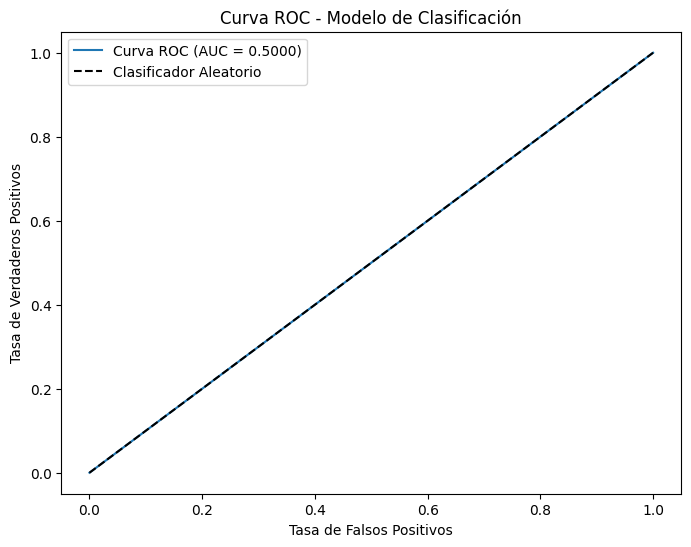

In [172]:
import matplotlib.pyplot as plt
from sklearn.metrics import roc_curve

def plot_roc_curve(model, loader, device):
    model.eval()
    all_probs = []
    all_labels = []
    with torch.no_grad():
        for X_batch, y_batch in loader:
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)
            
            outputs = model(X_batch)
            all_probs.extend(outputs.cpu().numpy())
            all_labels.extend(y_batch.cpu().numpy())
    
    fpr, tpr, thresholds = roc_curve(all_labels, all_probs)
    plt.figure(figsize=(8,6))
    plt.plot(fpr, tpr, label=f'Curva ROC (AUC = {roc_auc_score(all_labels, all_probs):.4f})')
    plt.plot([0,1], [0,1], 'k--', label='Clasificador Aleatorio')
    plt.xlabel('Tasa de Falsos Positivos')
    plt.ylabel('Tasa de Verdaderos Positivos')
    plt.title('Curva ROC - Modelo de Clasificación')
    plt.legend()
    plt.show()

# Plotea la Curva ROC
plot_roc_curve(model_class, test_loader_class, device)


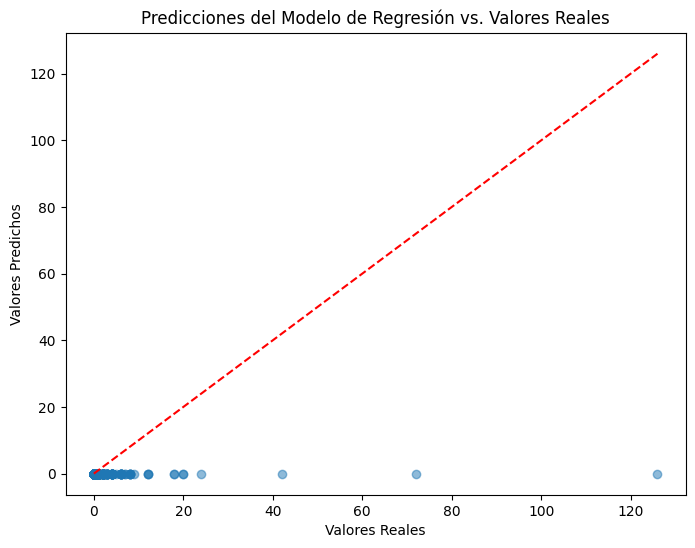

In [173]:
def plot_regression_results(model, loader, device):
    model.eval()
    all_preds = []
    all_labels = []
    with torch.no_grad():
        for X_batch, y_batch in loader:
            X_batch = X_batch.to(device)
            y_batch = y_batch.to(device)
            
            outputs = model(X_batch)
            
            all_preds.extend(outputs.cpu().numpy())
            all_labels.extend(y_batch.cpu().numpy())
    
    plt.figure(figsize=(8,6))
    plt.scatter(all_labels, all_preds, alpha=0.5)
    plt.xlabel('Valores Reales')
    plt.ylabel('Valores Predichos')
    plt.title('Predicciones del Modelo de Regresión vs. Valores Reales')
    plt.plot([min(all_labels), max(all_labels)], [min(all_labels), max(all_labels)], 'r--')  # Línea diagonal
    plt.show()

# Plotea los Resultados de Regresión
plot_regression_results(model_reg, test_loader_reg, device)
